Titanic Project

This project explores the titanic dataset from Kaggle repository in Google Colab environment. The titanic dataset is divided into training and test dataset. Using supervised machine learning models, predicted the target variable for the test dataset.

In [1]:
#Mount the Google Drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
! pip install kaggle

In [3]:
#Create Directory
! mkdir ~/.kaggle

In [4]:
#Copy the Kaggle JSON File
!cp "/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/

In [5]:
#Modify the permissions of JSON file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#Download the titanic dataset using API Command
!kaggle datasets download -d brendan45774/test-file

  0% 0.00/11.2k [00:00<?, ?B/s]
100% 11.2k/11.2k [00:00<00:00, 10.5MB/s]


In [7]:
#Export the data from zip file
import zipfile
with zipfile.ZipFile('/content/test-file.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [89]:
#Import statement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Exploratory Data Analysis

In [104]:
#Read the CSV file
df_titanic_dataset = pd.read_csv('/content/tested.csv', delimiter = ",")
df_titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
#Verify the dataset for missing values
print("Summary of missing values in the titanic dataset:\n")
print(df_titanic_dataset.isnull().sum())

#Display information about the dataset
print("Information of the titanic dataset: \n")
print(df_titanic_dataset.info())

Summary of missing values in the titanic dataset:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Information of the titanic dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     4

Text(0, 0.5, 'Count')

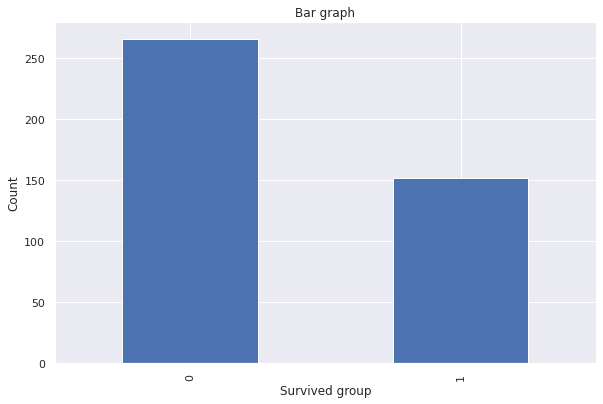

In [111]:
#Graph for survived column
fig = plt.figure()
ax = df_titanic_dataset['Survived'].value_counts().plot(kind='bar')
ax.set_title("Bar graph")
ax.set_xlabel("Survived group")
ax.set_ylabel("Count")

# Data Pre-processing

In [59]:
#Drop the passenger ID, name and ticket
#Columns do not provide any information
df_titanic_dataset.drop(columns=['PassengerId', 'Name', 'Ticket'],  axis = 1, inplace = True)

In [60]:
#Analyze the missing values of Age column
df_titanic_dataset.groupby(df_titanic_dataset['Age'].isnull()).mean()

#We observe age values are missing in random

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.382530,2.144578,30.27259,0.481928,0.397590,40.982087
True,0.290698,2.732558,NaN,0.313953,0.372093,15.017055


In [63]:
#Fill missing values in age with average
df_titanic_dataset['Age'].fillna(df_titanic_dataset['Age'].mean(), inplace = True)
df_titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S


In [65]:
#Missing value for fare in the dataset
df_titanic_dataset[df_titanic_dataset['Fare'].isnull() == True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,0,3,male,60.5,0,0,NaN,NaN,S


In [66]:
#Average value for fare with Pclass 3
print("Average value: ", df_titanic_dataset[df_titanic_dataset['Pclass'] == 3]['Fare'].mean())

#Fill missing values in fare
df_titanic_dataset['Fare'].fillna(df_titanic_dataset[df_titanic_dataset['Pclass'] == 3]['Fare'].mean(), inplace = True)
df_titanic_dataset.head()

Average value:  12.459677880184334


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S


In [67]:
#Observe missing values in Cabin column
df_titanic_dataset.pivot_table(index =['Pclass'],
                       values =['Age', 'Fare', 'Cabin', 'Embarked'],
                       aggfunc ='count')

#We observe less cabins are assigned to passengers with class 2 and 3.
#Due to which the column is not complelety eliminated. The values are not missing at random.

,Age,Cabin,Embarked,Fare
Pclass,,,,
1,107,80,107,107
2,93,7,93,93
3,218,4,218,218


In [68]:
#Fill in missing values for Cabin
df_titanic_dataset['Cabin'] = np.where(df_titanic_dataset['Cabin'].isnull(), 0, 1)

In [69]:
#Code to handle categorical variables
ls_unique_values = pd.unique(df_titanic_dataset['Sex'])
variable_mapping = {}
count = 0
for value in ls_unique_values:
  variable_mapping[value] = count
  count = count + 1
print("Label map for {}: {}".format("Sex", variable_mapping))
df_titanic_dataset['Sex'] = df_titanic_dataset['Sex'].map(variable_mapping)

Label map for Sex: {'male': 0, 'female': 1}


In [70]:
#We observe column Embarked
df_titanic_dataset.pivot_table(index =['Survived'],
                       values =['Age', 'Fare', 'Cabin', 'Embarked'],
                       aggfunc ='count')

#Does not provide any information. Due to which the column is dropped.
df_titanic_dataset.drop(columns=['Embarked'], axis = 1, inplace = True)
df_titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


# Model Development

In [92]:
#Separate the data and target column
data = df_titanic_dataset.iloc[:,1:8]
target = df_titanic_dataset.iloc[:,0]

In [93]:
#Forming the training and testing dataset
#80% of training set, 20% testing set
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.2, random_state = 72)

In [94]:
#Display the structure of dataset
print("Training dataset: ", data_train.shape)
print("Training dataset target: ", target_train.shape)
print("Testing dataset: ", data_test.shape)
print("Testing dataset target: ", target_test.shape)

Training dataset:  (334, 7)
Training dataset target:  (334,)
Testing dataset:  (84, 7)
Testing dataset target:  (84,)


In [95]:
#Display the top 5 rows
print("Training dataset:\n", data_train.head())
print("Training dataset target:\n", target_train.head())
print("Testing dataset:\n", data_test.head())
print("Testing dataset target:\n", target_test.head())

Training dataset:
      Pclass  Sex       Age  SibSp  Parch     Fare  Cabin
105       3    0  28.00000      0      0  22.5250      0
120       2    1  12.00000      0      0  15.7500      0
111       3    1  30.27259      0      0   7.7792      0
44        1    1  45.00000      1      0  52.5542      1
33        3    1  30.27259      1      2  23.4500      0
Training dataset target:
 105    0
120    1
111    1
44     1
33     1
Name: Survived, dtype: int64
Testing dataset:
      Pclass  Sex       Age  SibSp  Parch     Fare  Cabin
284       3    1   2.00000      1      1  20.2125      0
328       2    0  29.00000      1      0  26.0000      0
191       1    0  30.27259      0      0  26.0000      0
305       1    1  64.00000      1      1  26.5500      1
177       1    0  54.00000      1      0  55.4417      1
Testing dataset target:
 284    1
328    0
191    0
305    1
177    0
Name: Survived, dtype: int64


In [112]:
#Calculate the performance metrics
sns.set(rc={'figure.figsize':(9.7,6.27)})
def cal_performance_metric(test_label, prediction_label, prediction_prob):

  # Model Accuracy
  print('Accuracy: %0.3f' % accuracy_score(test_label, prediction_label))
  
  # Precision
  print('Precision: %0.3f' % precision_score(test_label, prediction_label))  
  
  # Recall
  print('Recall: %0.3f' % recall_score(test_label, prediction_label))

  # F1 score
  print('F1 score: %0.3f' % f1_score(test_label, prediction_label))

  # ROC curve
  ROC = roc_auc_score(test_label, prediction_prob)
  print('ROC Curve: %0.3f' % ROC)
  
  # Confusion matrix
  results = confusion_matrix(test_label, prediction_label)
  print("Confusion matrix: \n", sns.heatmap(results, annot=True, fmt='g')) 

## Support Vector Machine

In [103]:
#Analyze the scores using SVM model
model_SVM = svm.SVC(kernel = 'linear', C = 5, random_state = 50)
scores = cross_val_score(model_SVM, data, target, cv = 5)

print("Model %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Model 1.00 accuracy with a standard deviation of 0.00


## Random Forest

In [98]:
#Create the Random Forest Model using Grid Search CV
RF_model = RandomForestClassifier()
parameters = {'n_estimators': [10, 20, 30 , 40, 50], 'max_depth': [5, 10]}
grid = GridSearchCV(RF_model, param_grid = parameters)
grid.fit(data_train, target_train)
print("Optimal model structure:\n", grid.best_estimator_)

#Predict values for test dataset
prediction = grid.predict(data_test)

#Predict proabilities for test dataset
prediction_prob = grid.predict_proba(data_test)
#Select Positive Outcome
prediction_prob = prediction_prob[:, 1]

Optimal model structure:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 score: 1.000
ROC Curve: 1.000
Confusion matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)


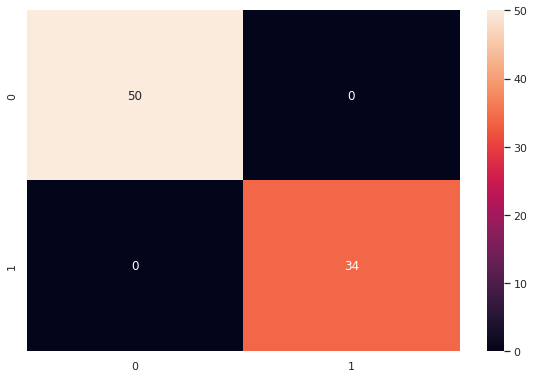

In [113]:
#Calculate performance of the Random Forest
cal_performance_metric(target_test, prediction, prediction_prob)

## Naïve bayes

In [100]:
#Create the Naïve bayes using Grid Search CV
NB_model = GaussianNB()
parameters = {'var_smoothing': [1e-09, 0.5, 1]}
grid = GridSearchCV(NB_model, param_grid = parameters, cv = 2)
grid.fit(data_train, target_train)
print("Optimal model structure:\n", grid.best_estimator_)

#Predict values for test dataset
prediction = grid.predict(data_test)

#Predict proabilities for test dataset
prediction_prob = grid.predict_proba(data_test)
#Select Positive Outcome
prediction_prob = prediction_prob[:, 1]

Optimal model structure:
 GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 score: 1.000
ROC Curve: 1.000
Confusion matrix: 
 AxesSubplot(0.125,0.125;0.62x0.755)


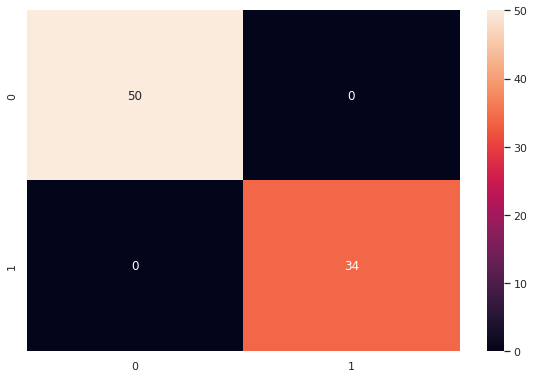

In [101]:
#Performance for the Naïve bayes model
cal_performance_metric(target_test, prediction, prediction_prob)

# Performance summary

We observe 100% accuracy using the test dataset for all the models. We analyzed the scores using cross validation technique to achieve the actual score for the dataset. The model generates 50 True Positive and 34 True Negative. The False Positive and False Negative is 0. Due to these results, the remaining performance parameters such as precision, recall and F1 score is 100%.